In [1]:
import requests
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format='retina'

sns.set_style("darkgrid")

In [3]:
import datapane as dp

In [4]:
#game data
url = 'https://fantasy.premierleague.com/api/bootstrap-static/'

r = requests.get(url)

json_data = r.json()

elements_df = pd.DataFrame(json_data['elements'])
elements_types_df = pd.DataFrame(json_data['element_types'])
teams_df = pd.DataFrame(json_data['teams'])

In [5]:
json_data.keys()

dict_keys(['events', 'game_settings', 'phases', 'teams', 'total_players', 'elements', 'element_stats', 'element_types'])

In [6]:
json_data['total_players']

9167407

In [35]:
league_code = "617009"
url = f'https://fantasy.premierleague.com/api/leagues-classic/{league_code}/standings/'

r = requests.get(url)

league = r.json()

df_league = pd.DataFrame(league['standings']['results'])

df_league = df_league[df_league["id"]!=64911474]
df_league

,id,event_total,player_name,rank,last_rank,rank_sort,total,entry,entry_name
0,25158712,72,George Baker Baker,1,2,1,2587,1796385,Borocelona
1,22488436,71,Pete Stebbing,2,1,2,2584,1861744,Diego Marastebbo
2,16819673,72,Ted Rosner,3,3,3,2476,107878,Blaise Maweedie
3,16523966,62,James Rivers,4,4,4,2462,2805214,Cry me a River
4,21699595,78,Henry Elks,5,5,5,2427,2631883,Debbie Does Gallas
5,20241183,80,Henry Turnbull,6,6,6,2422,1364762,Expected Ghouls
6,29875475,43,A A,7,7,7,2348,1390493,Nanas
7,20076908,66,Sam Guest,8,8,8,2298,776505,@BenCrellin was here
8,23446904,60,Luke Betham,9,9,9,2157,1583735,Nanas Squad
9,43941031,47,James Fazackerley,10,10,10,2054,1447926,Mike Dean's Bean


In [36]:
url = 'https://fantasy.premierleague.com/api/entry/4914782/history/'
r = requests.get(url)
json = r.json()
json.keys()

dict_keys(['current', 'past', 'chips'])

In [37]:
pd.DataFrame(json['past'])

,season_name,total_points,rank
0,2018/19,1579,5230067
1,2019/20,1883,3291247
2,2020/21,2045,2191579


In [38]:
df_all = pd.DataFrame(columns=['event', 'points', 'total_points', 'rank', 'rank_sort', 'overall_rank',
       'bank', 'value', 'event_transfers', 'event_transfers_cost',
       'points_on_bench', 'player','team_name'])
# get all players data from a league
for i, val in enumerate(df_league.entry):
    url = 'https://fantasy.premierleague.com/api/entry/{}/history/'.format(val)

    r = requests.get(url)

    json = r.json()

    df_temp=pd.DataFrame(json['current'])
    print(val,df_league.iloc[i,2],df_league.iloc[i,8])
    df_temp['player'] = df_league.iloc[i,2]
    df_temp['team_name'] = df_league.iloc[i,8]
    df_all= pd.concat([df_all,df_temp])
    

1796385 George Baker Baker Borocelona
1861744 Pete Stebbing Diego Marastebbo
107878 Ted Rosner Blaise Maweedie
2805214 James Rivers Cry me a River
2631883 Henry Elks Debbie Does Gallas
1364762 Henry Turnbull Expected Ghouls
1390493 A A Nanas
776505 Sam Guest @BenCrellin was here
1583735 Luke Betham Nanas Squad
1447926 James Fazackerley Mike Dean's Bean
4910848 Leo Anthias Football FC
3651523 Nick Sissling Sissling Select
6229066 Toby Powell Tubbalubba Kings XI


In [39]:
# cleaning
for col in df_all:
    try:
        df_all[col]=df_all[col].astype(float)
    except:
        pass
    
df_all['player'] = df_all['player'].apply(lambda x: "Alex Andreou" if x == "A A" else x)
df_all['player'] = df_all['player'].apply(lambda x: "Turnbull" if x == "Henry Turnbull" else x)
df_all['player'] = df_all['player'].apply(lambda x: "Faz" if x == "James Fazackerley" else x)
df_all['player'] = df_all['player'].apply(lambda x: "Elks" if x == "Henry Elks" else x)
df_all['player'] = df_all['player'].apply(lambda x: x.split()[0])

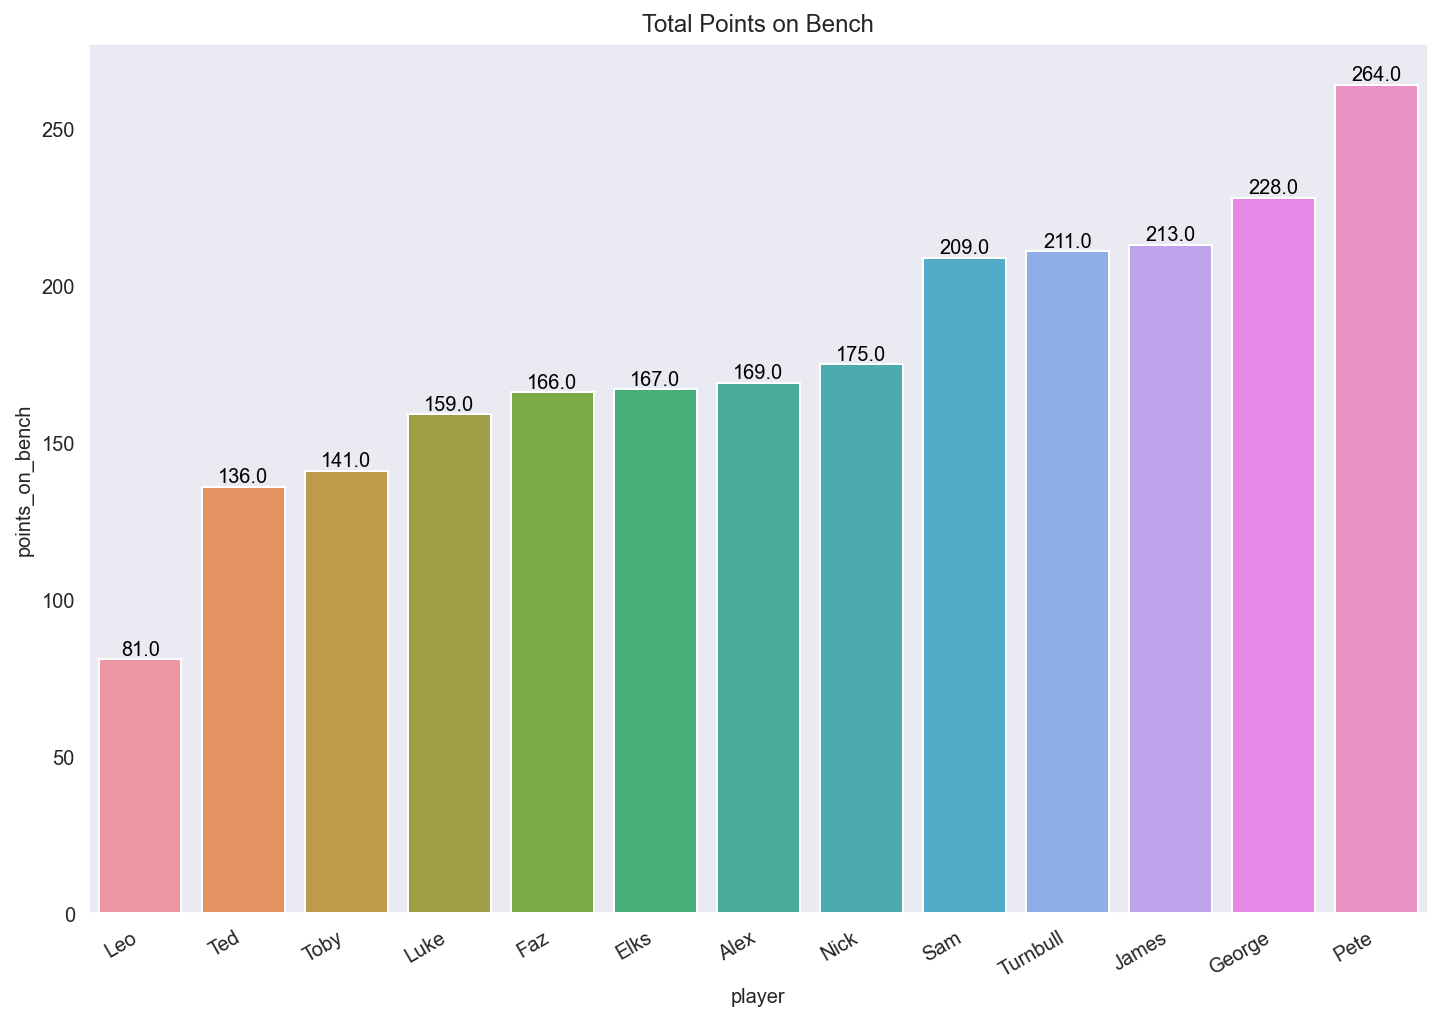

In [40]:
# Total points on Bench
df_temp = df_all.groupby('player').sum()[['points_on_bench']].sort_values('points_on_bench')
plt.figure(figsize=(12,8))
bench_chart=sns.barplot(y=df_temp.points_on_bench,x=df_temp.index)
plt.title("Total Points on Bench")
plt.xticks(rotation=30,ha="right")
for p in bench_chart.patches:
    bench_chart.annotate(round(p.get_height(),2), (p.get_x() + p.get_width() / 2., p.get_height()),
     ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
     textcoords='offset points')
plt.show()

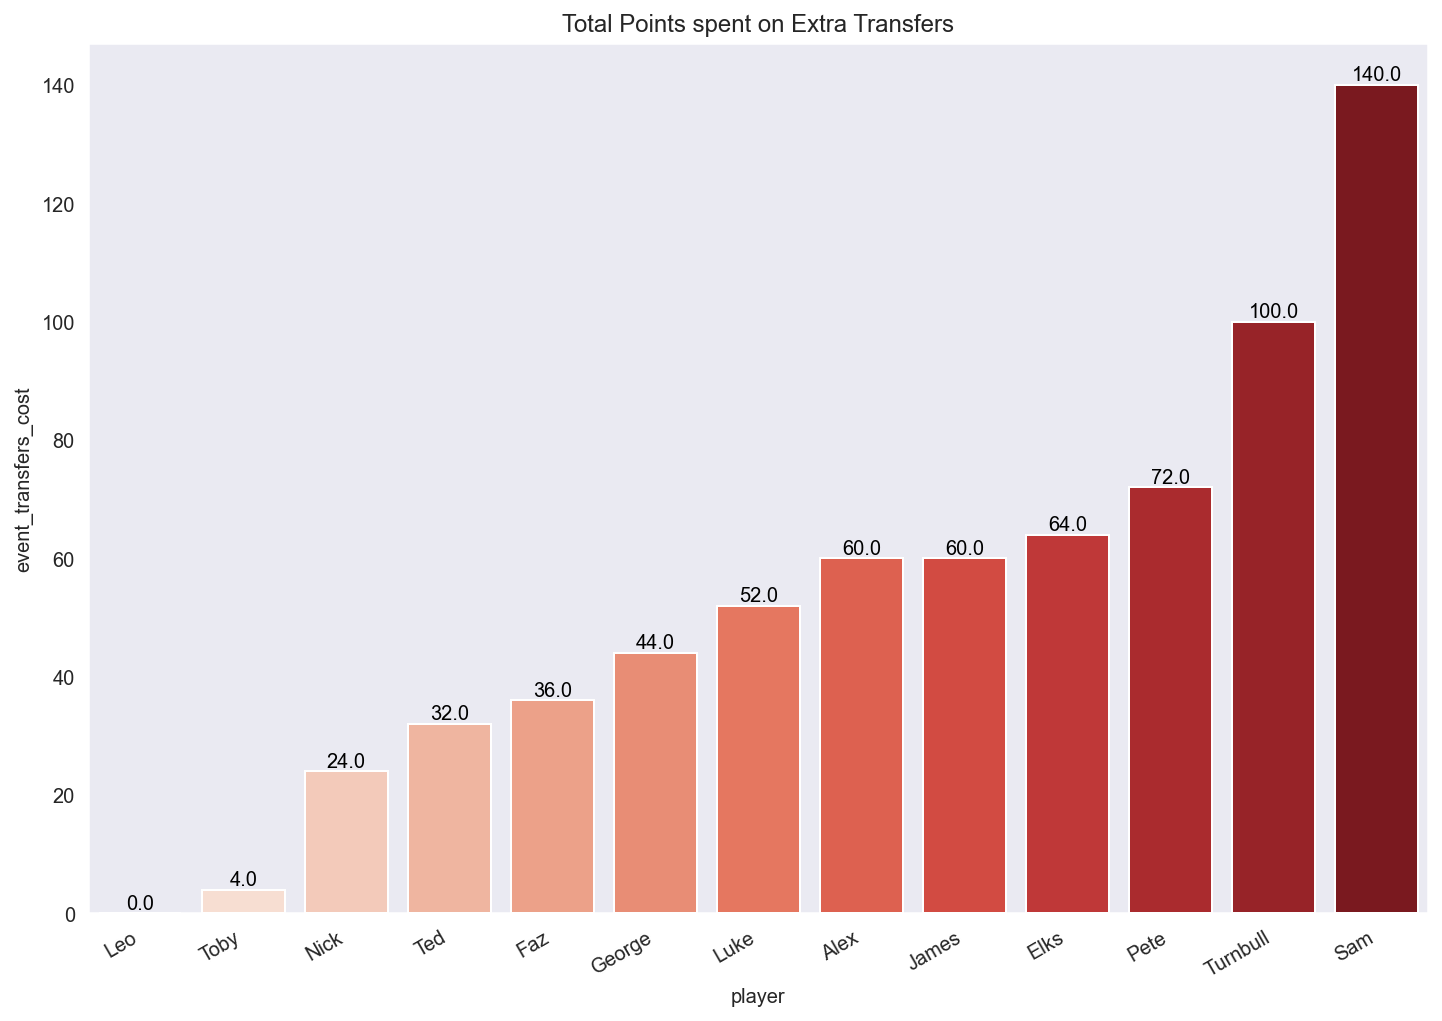

In [41]:
# Extra Transfers cost
df_temp = df_all.groupby('player').sum()[['event_transfers_cost']].sort_values('event_transfers_cost')
plt.figure(figsize=(12,8))
x_transfers = sns.barplot(y=df_temp.event_transfers_cost,x=df_temp.index,palette='Reds')
plt.title("Total Points spent on Extra Transfers")
plt.xticks(rotation=30,ha="right")
for p in x_transfers.patches:
    x_transfers.annotate(round(p.get_height(),2), (p.get_x() + p.get_width() / 2., p.get_height()),
     ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
     textcoords='offset points')
plt.show()

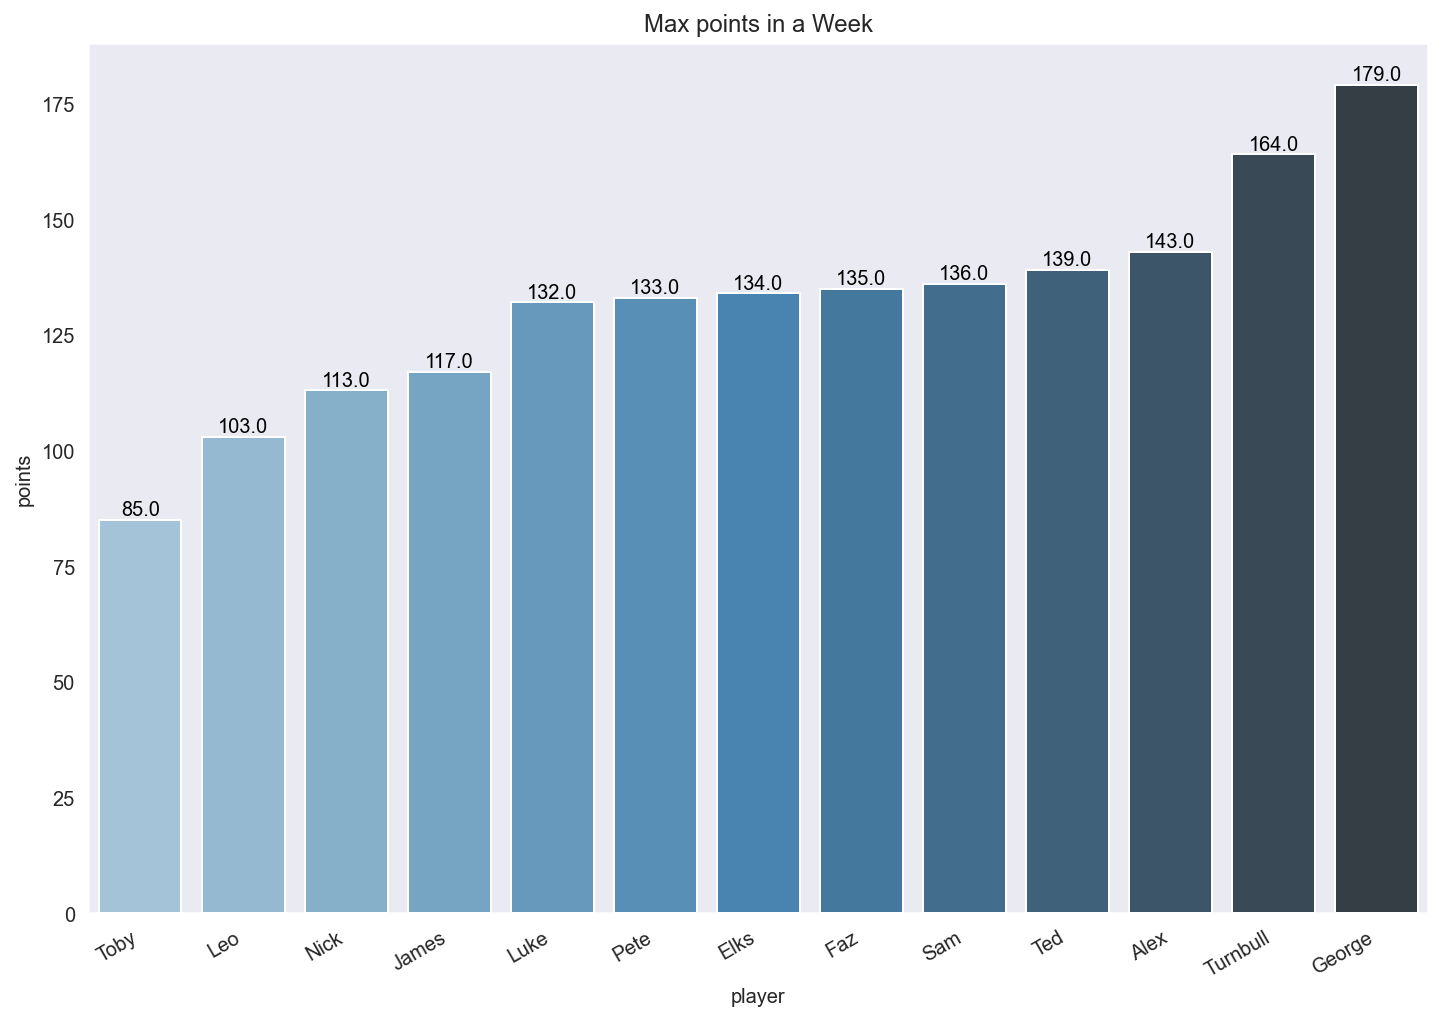

In [42]:
# Max points in a week
df_temp = df_all.groupby('player').max()[['points']].sort_values('points')
plt.figure(figsize=(12,8))
max_week = sns.barplot(y=df_temp.points,x=df_temp.index,palette='Blues_d')
plt.title("Max points in a Week")
plt.xticks(rotation=30,ha="right")
for p in max_week.patches:
    max_week.annotate(round(p.get_height(),2), (p.get_x() + p.get_width() / 2., p.get_height()),
     ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
     textcoords='offset points')

plt.show()

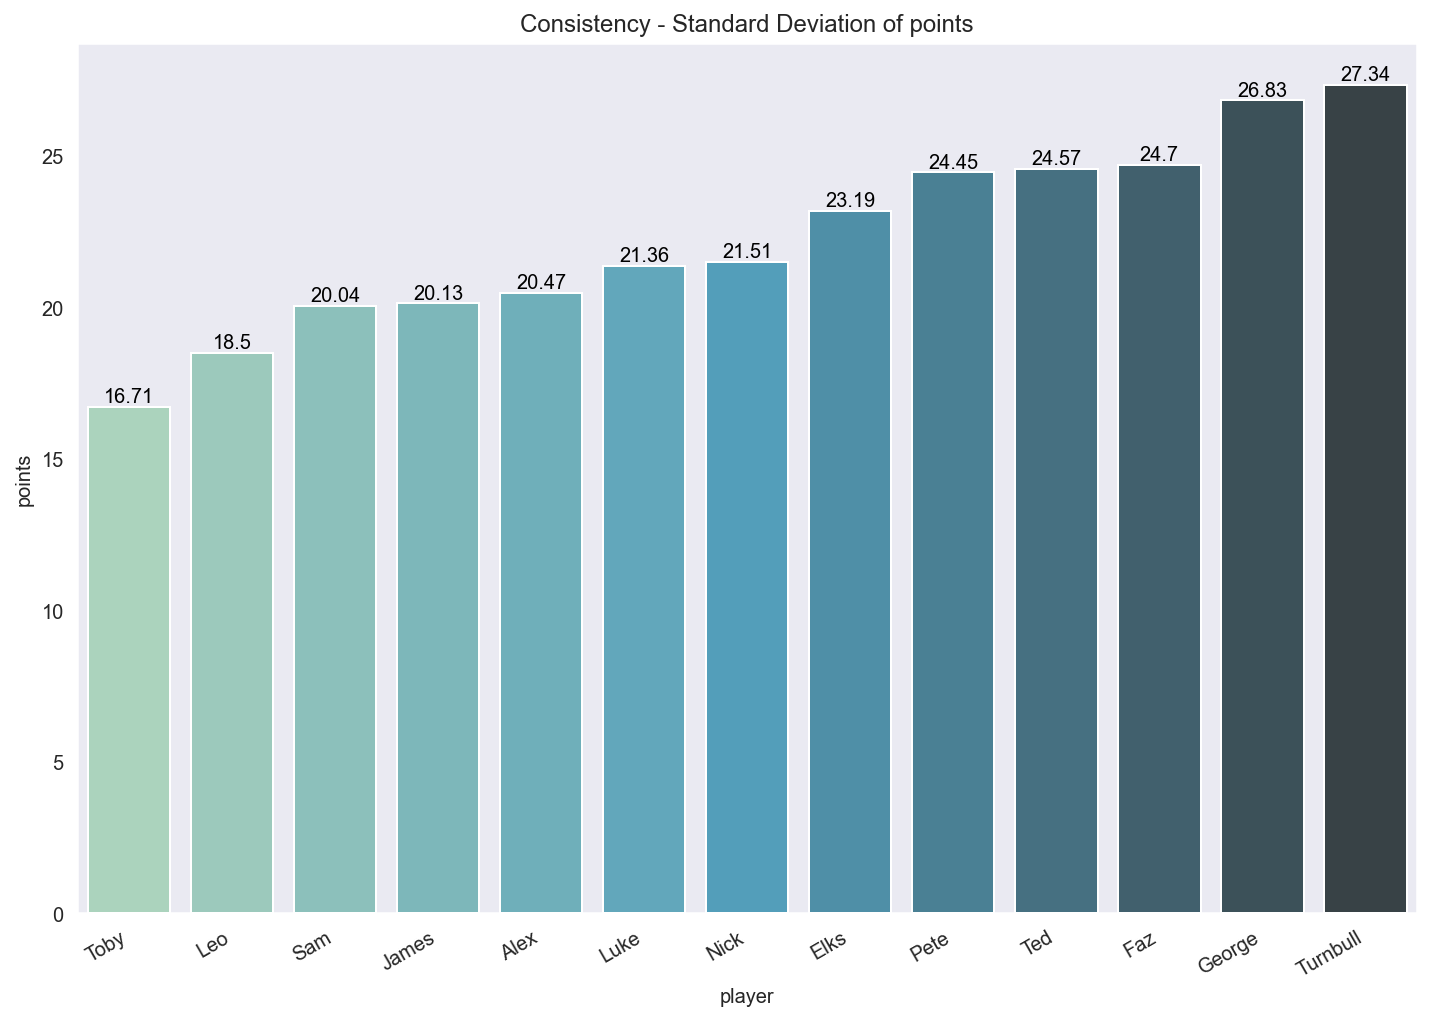

In [43]:
# Std dev points 
df_temp = df_all.groupby('player').std()[['points']].sort_values('points')
plt.figure(figsize=(12,8))
consistency=sns.barplot(y=df_temp.points,x=df_temp.index,palette="GnBu_d")
plt.title("Consistency - Standard Deviation of points")
plt.xticks(rotation=30,ha="right")
for p in consistency.patches:
    consistency.annotate(round(p.get_height(),2), (p.get_x() + p.get_width() / 2., p.get_height()),
     ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
     textcoords='offset points')
plt.show()

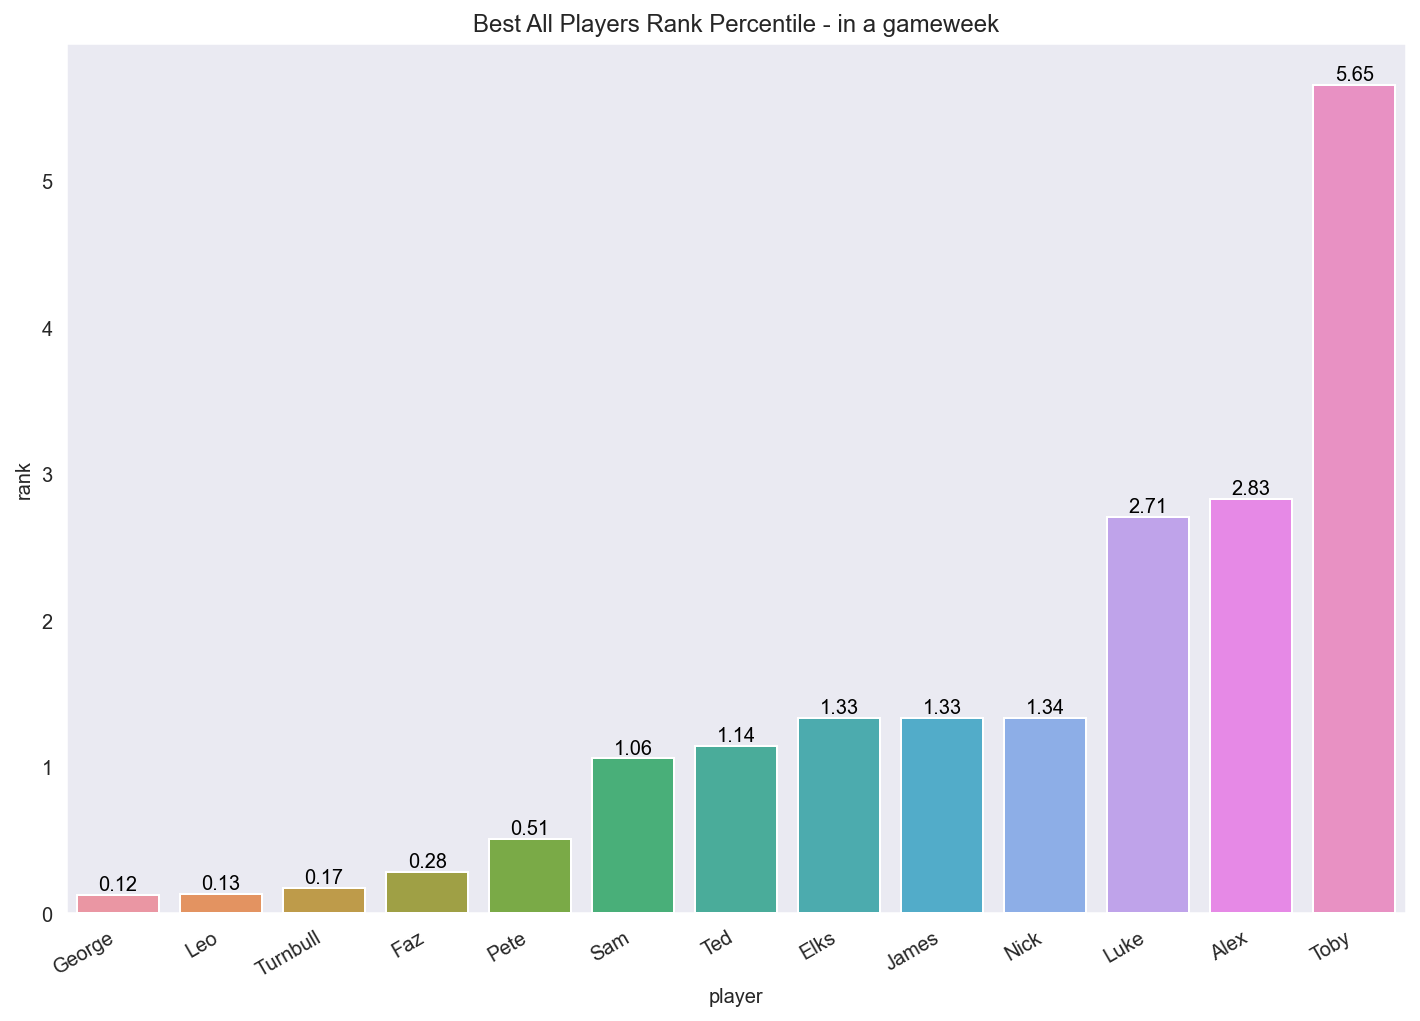

In [44]:
# Best UK Rank Percentile in a gameweek
df_temp = df_all.groupby('player').min()[['rank']].sort_values('rank')/int(json_data['total_players'])*100
plt.figure(figsize=(12,8))
chart=sns.barplot(y=df_temp['rank'],x=df_temp.index)
plt.title("Best All Players Rank Percentile - in a gameweek")
plt.xticks(rotation=30,ha="right")
for p in chart.patches:
    chart.annotate(round(p.get_height(),2), (p.get_x() + p.get_width() / 2., p.get_height()),
     ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
     textcoords='offset points')
plt.show()

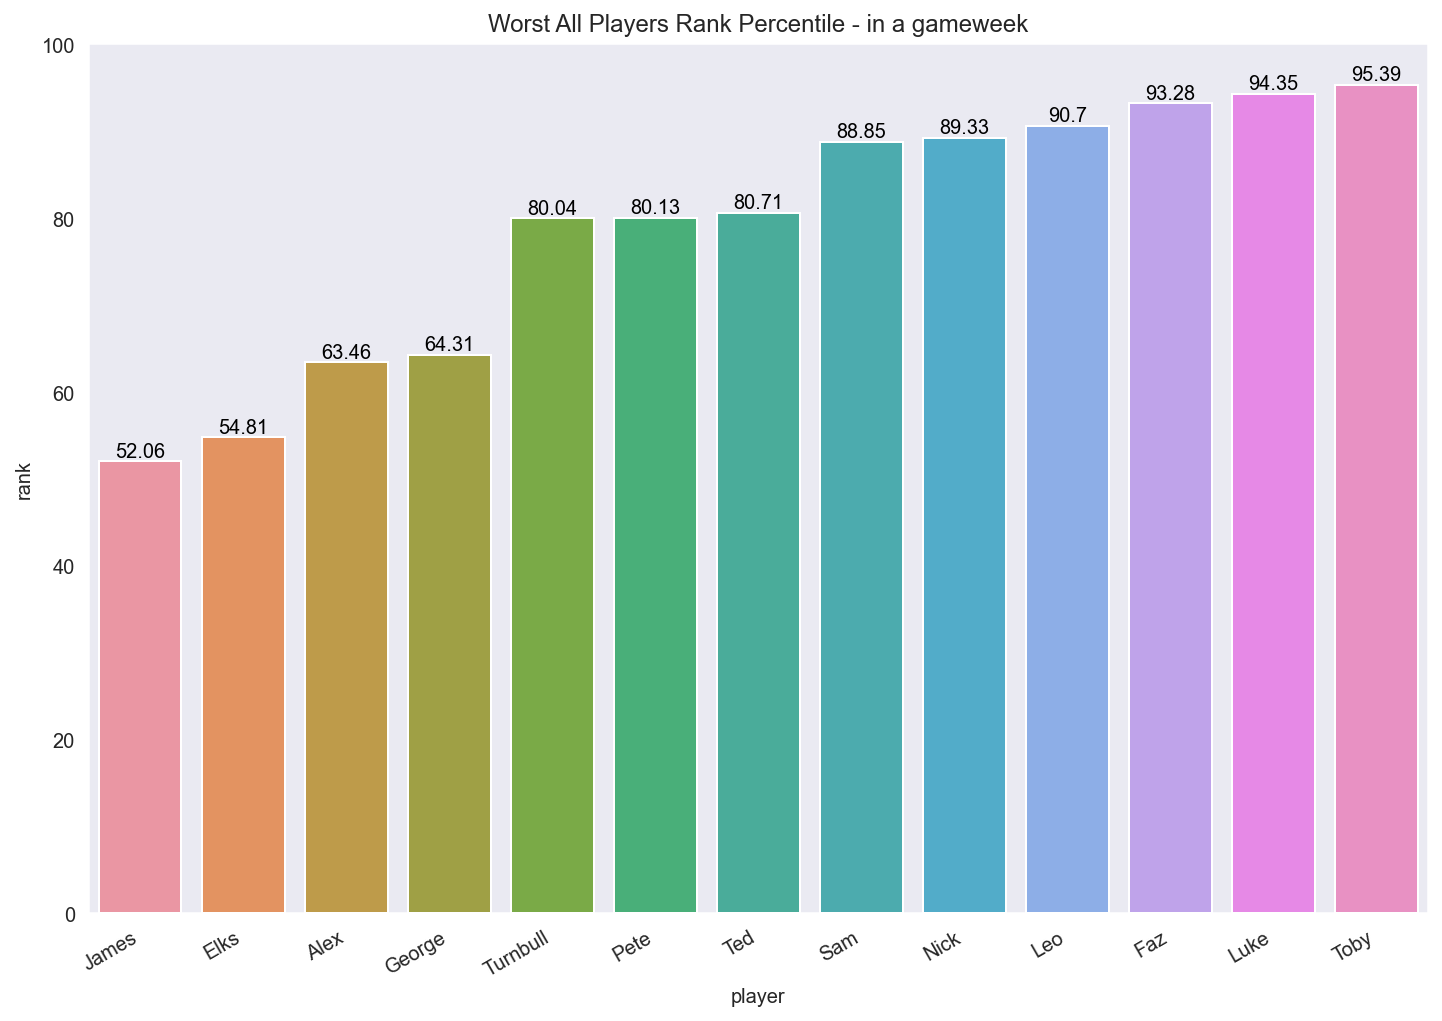

In [45]:
# Worst UK Rank Percentile in a gameweek
df_temp = df_all.groupby('player').max()[['rank']].sort_values('rank')/int(json_data['total_players'])*100
plt.figure(figsize=(12,8))
chart = sns.barplot(y=df_temp['rank'],x=df_temp.index)
plt.title("Worst All Players Rank Percentile - in a gameweek")
plt.xticks(rotation=30,ha="right")
for p in chart.patches:
    chart.annotate(round(p.get_height(),2), (p.get_x() + p.get_width() / 2., p.get_height()),
     ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
     textcoords='offset points')
plt.show()

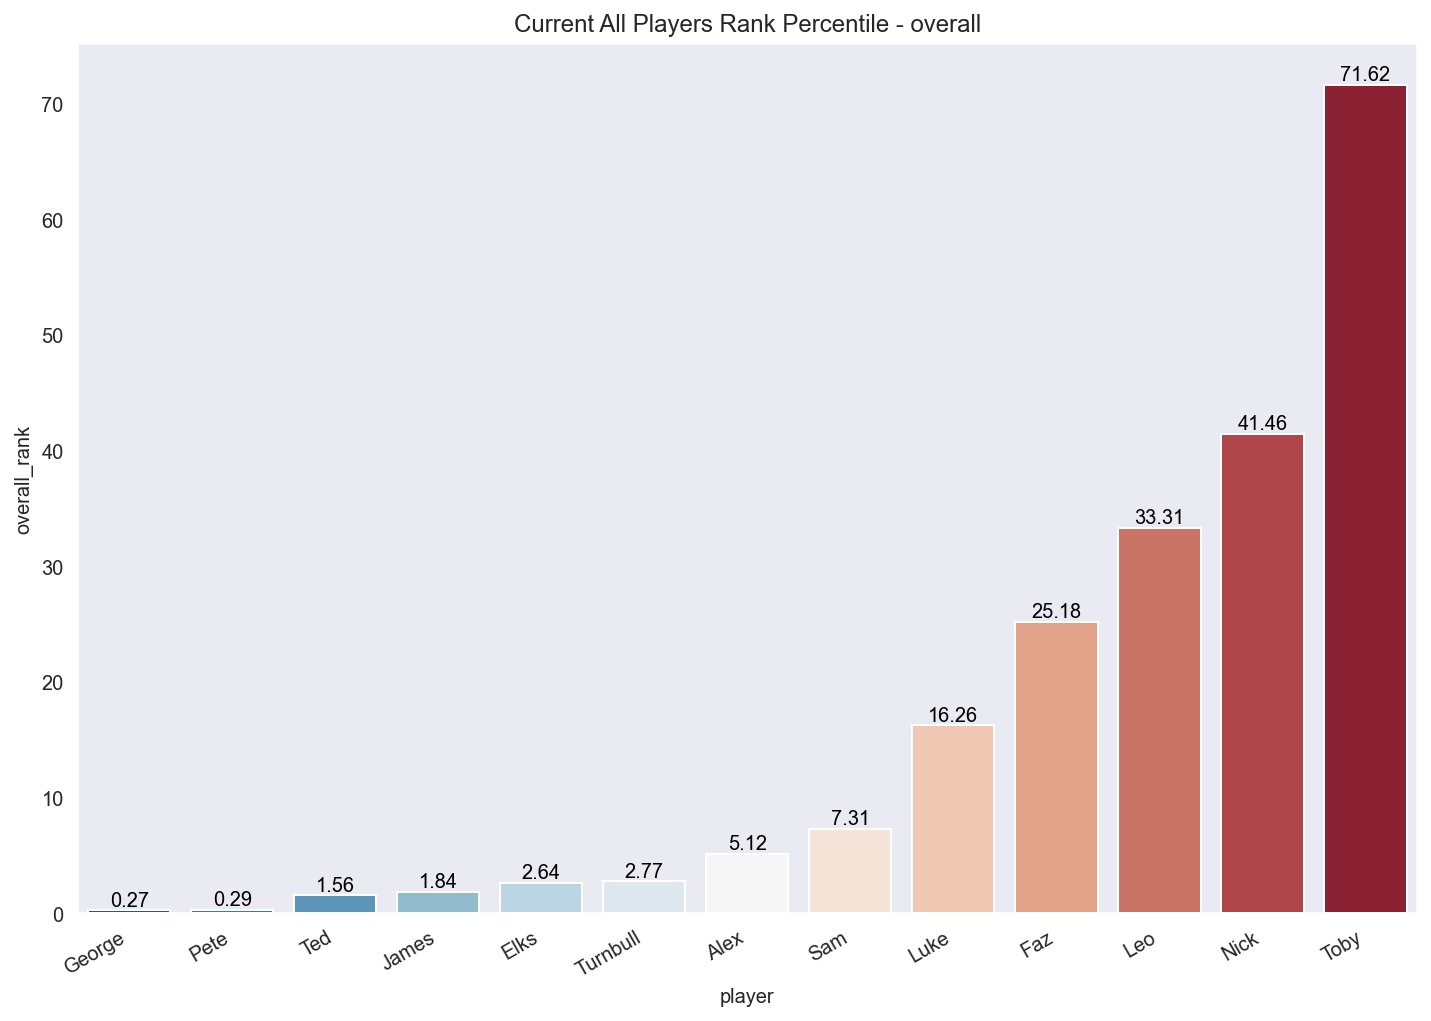

In [46]:
# Current all players rank
df_temp = df_all[df_all['event']==df_all['event'].max()][['overall_rank','player']].sort_values('overall_rank')
df_temp['overall_rank']=df_temp['overall_rank']/int(json_data['total_players'])*100
plt.figure(figsize=(12,8))
current_percentile = sns.barplot(y=df_temp['overall_rank'],x=df_temp.player, palette = "RdBu_r")
plt.title("Current All Players Rank Percentile - overall")
plt.xticks(rotation=30,ha="right")
for p in current_percentile.patches:
    current_percentile.annotate(round(p.get_height(),2), (p.get_x() + p.get_width() / 2., p.get_height()),
     ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
     textcoords='offset points')
plt.show()

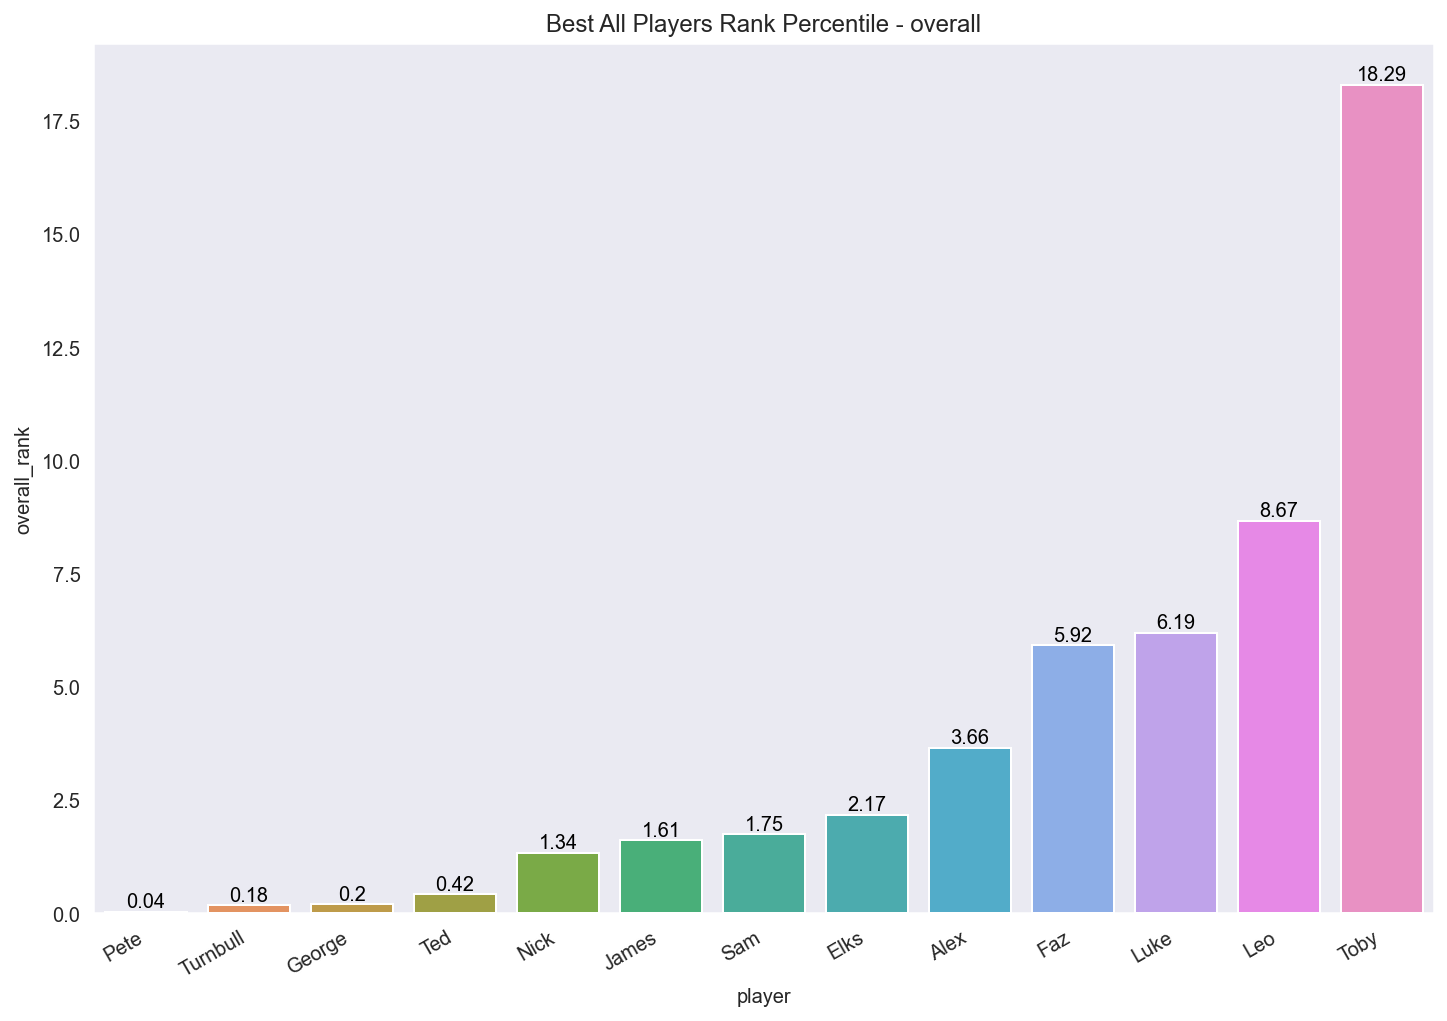

In [47]:
# Best UK Rank Percentile in a gameweek
df_temp = df_all.groupby('player').min()[['overall_rank']].sort_values('overall_rank')/int(json_data['total_players'])*100
plt.figure(figsize=(12,8))
chart = sns.barplot(y=df_temp['overall_rank'],x=df_temp.index)
plt.title("Best All Players Rank Percentile - overall")
plt.xticks(rotation=30,ha="right")
for p in chart.patches:
    chart.annotate(round(p.get_height(),2), (p.get_x() + p.get_width() / 2., p.get_height()),
     ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
     textcoords='offset points')
plt.show()

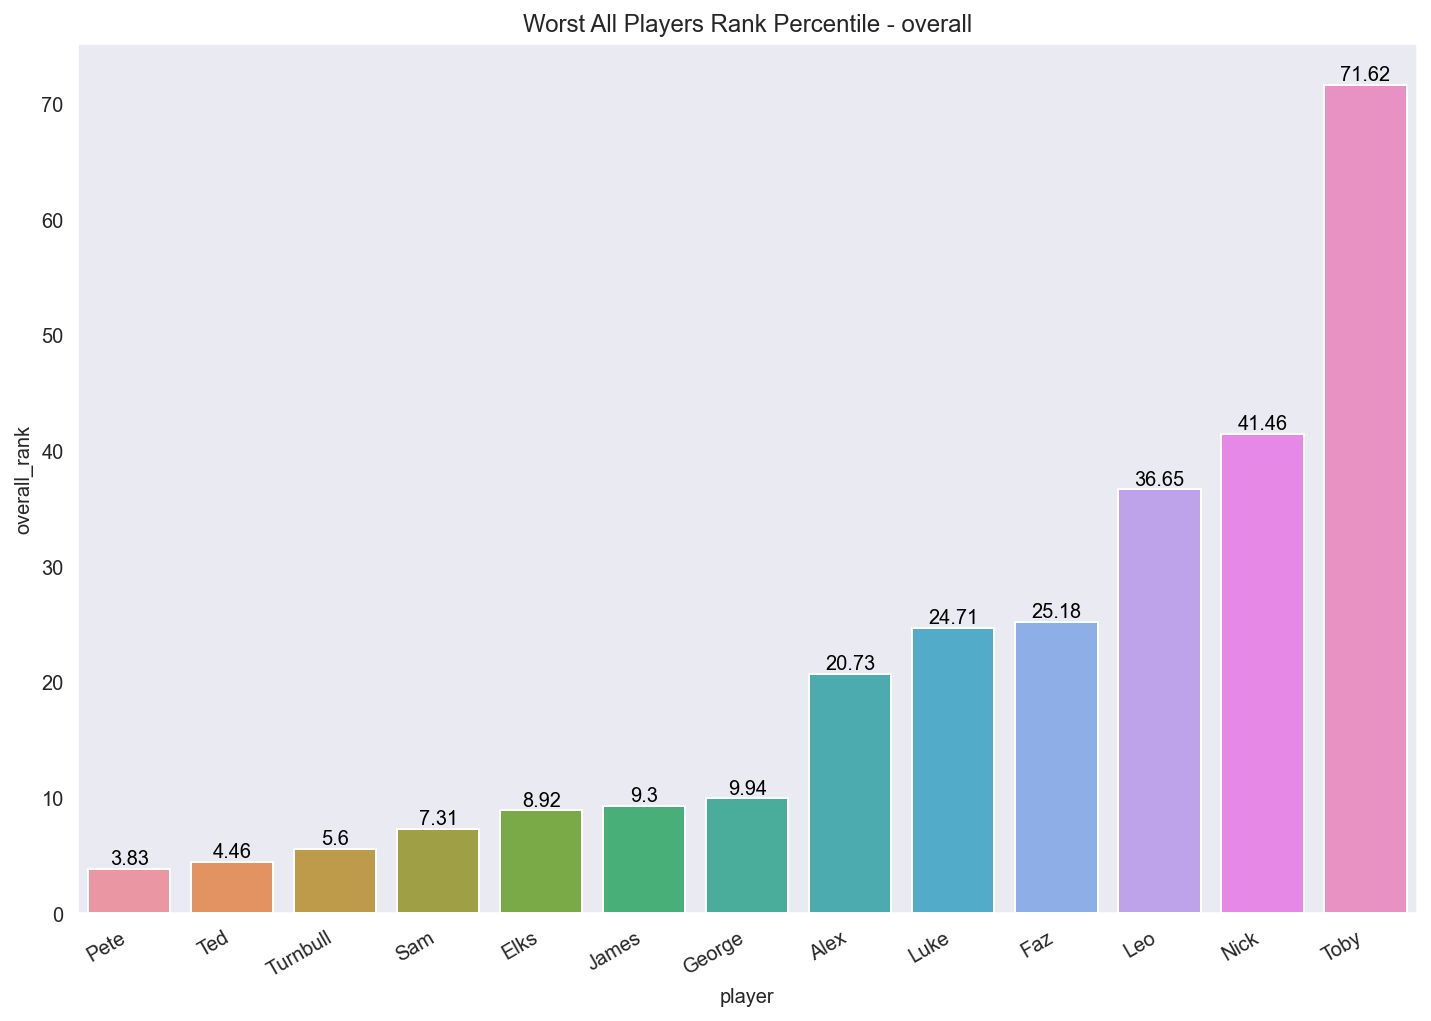

In [48]:
# Best UK Rank Percentile in a gameweek
df_temp = df_all.groupby('player').max()[['overall_rank']].sort_values('overall_rank')/int(json_data['total_players'])*100
plt.figure(figsize=(12,8))
chart = sns.barplot(y=df_temp['overall_rank'],x=df_temp.index)
plt.title("Worst All Players Rank Percentile - overall")
plt.xticks(rotation=30,ha="right")
for p in chart.patches:
    chart.annotate(round(p.get_height(),2), (p.get_x() + p.get_width() / 2., p.get_height()),
     ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
     textcoords='offset points')
plt.show()

In [49]:
df_all = df_all.sort_values(by='event')
rank_list = []
for e in df_all.event.unique():
    df_temp = df_all[df_all.event==e]
    rank_list+=df_temp.total_points.rank(method='min',ascending=False).tolist()

In [50]:
df_all['rankpw']=rank_list

In [51]:
df_all

,event,points,total_points,rank,rank_sort,overall_rank,bank,value,event_transfers,event_transfers_cost,points_on_bench,player,team_name,rankpw
0,1.0,93.0,93.0,911355.0,942618.0,911352.0,0.0,1000.0,0.0,0.0,4.0,George,Borocelona,9.0
0,1.0,106.0,106.0,122432.0,142017.0,122431.0,0.0,1000.0,0.0,0.0,5.0,Nick,Sissling Select,2.0
0,1.0,106.0,106.0,122432.0,124495.0,122431.0,5.0,1000.0,0.0,0.0,9.0,Ted,Blaise Maweedie,2.0
0,1.0,90.0,90.0,1176051.0,1259450.0,1176048.0,0.0,1000.0,0.0,0.0,6.0,Leo,Football FC,10.0
0,1.0,94.0,94.0,817703.0,866188.0,817700.0,0.0,1000.0,0.0,0.0,1.0,James,Cry me a River,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37,38.0,71.0,2584.0,1327048.0,1336104.0,26306.0,25.0,1040.0,2.0,4.0,8.0,Pete,Diego Marastebbo,2.0
37,38.0,54.0,1972.0,3603686.0,3670624.0,3053665.0,16.0,1019.0,0.0,0.0,0.0,Leo,Football FC,11.0
37,38.0,72.0,2587.0,1195757.0,1204659.0,24497.0,29.0,1052.0,1.0,0.0,10.0,George,Borocelona,1.0
37,38.0,62.0,2462.0,2484522.0,2495003.0,168647.0,31.0,1049.0,2.0,4.0,2.0,James,Cry me a River,4.0


In [52]:
# df_all[df_all.event==2].sort_values('total_points',ascending=False).total_points.iloc[8]

In [53]:
dist_list = []
for e in df_all.event.unique():
    dist_list+=(df_all[df_all.event==e].total_points - df_all[df_all.event==e].total_points.max()).tolist()

In [54]:
df_all['distpw_from_first'] = dist_list

In [55]:
dist_list9 = []
for e in df_all.event.unique():
    dist_list9+=(df_all[df_all.event==e].total_points - df_all[df_all.event==e].sort_values('total_points',ascending=False).total_points.iloc[8]).tolist()
df_all['distpw_from_ninth'] = dist_list9


In [64]:
df_all.player

0     George
0       Nick
0        Ted
0        Leo
0      James
       ...  
37      Pete
37       Leo
37    George
37     James
37      Toby
Name: player, Length: 494, dtype: object

In [68]:
df_all.groupby("player").count()

,event,points,total_points,rank,rank_sort,overall_rank,bank,value,event_transfers,event_transfers_cost,points_on_bench,team_name,rankpw,distpw_from_first,distpw_from_ninth
player,,,,,,,,,,,,,,,
Alex,38,38,38,38,38,38,38,38,38,38,38,38,38,38,38
Elks,38,38,38,38,38,38,38,38,38,38,38,38,38,38,38
Faz,38,38,38,38,38,38,38,38,38,38,38,38,38,38,38
George,38,38,38,38,38,38,38,38,38,38,38,38,38,38,38
James,38,38,38,38,38,38,38,38,38,38,38,38,38,38,38
Leo,38,38,38,38,38,38,38,38,38,38,38,38,38,38,38
Luke,38,38,38,38,38,38,38,38,38,38,38,38,38,38,38
Nick,38,38,38,38,38,38,38,38,38,38,38,38,38,38,38
Pete,38,38,38,38,38,38,38,38,38,38,38,38,38,38,38


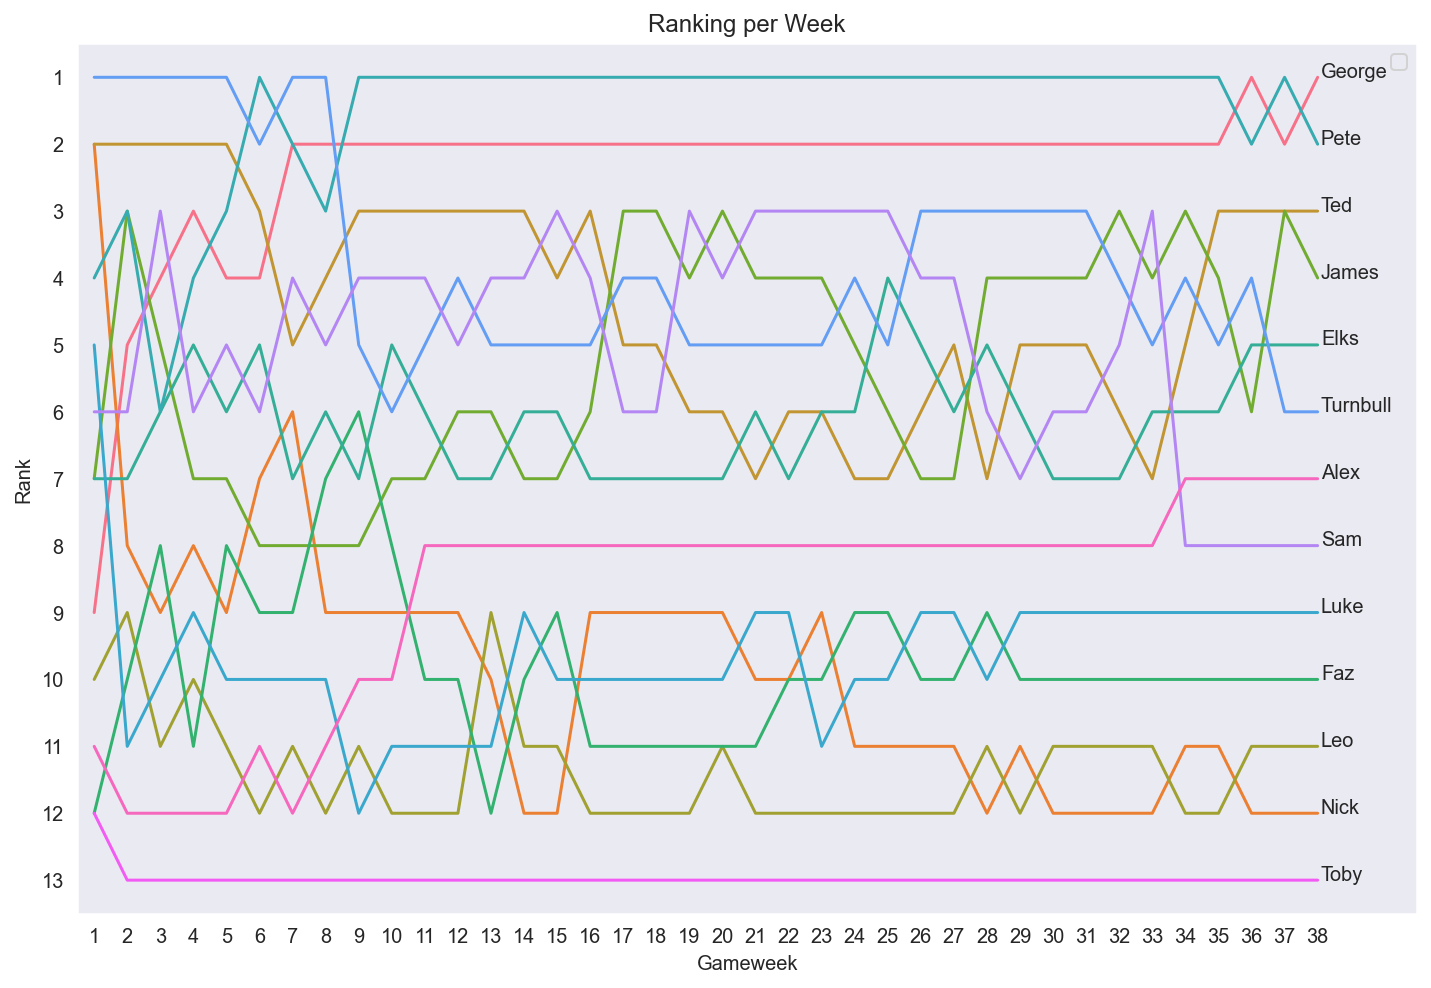

In [69]:
# create rank plot
gw = int(df_all.event.max())
curr_rank_list = df_all[df_all.event==gw].sort_values("total_points",ascending=False)["player"].tolist()
sns.set_style('dark')
plt.figure(figsize=(12,8))
ranking=sns.lineplot(y=df_all.rankpw.tolist(),x=df_all.event.tolist(),hue=df_all.player.tolist())
for i, name in enumerate(curr_rank_list):
    ranking.annotate(name,(gw+0.1,i+1))
plt.yticks(range(1,14))
plt.xticks(range(1,gw+1))
plt.xlim(0.5,gw+3)
plt.ylim(13.5,0.5)
plt.title("Ranking per Week")
plt.xlabel("Gameweek")
plt.ylabel("Rank")
plt.legend("")
plt.show()

In [72]:
# # create dist plot
# gw = int(df_all.event.max())
# curr_dist = df_all[df_all.event==gw].sort_values("total_points",ascending=False)[["player","distpw_from_first"]]
# sns.set_style('dark')
# plt.figure(figsize=(14,10))
# dist_first=sns.lineplot(y=df_all.distpw_from_first.tolist(),x=df_all.event.tolist(),hue=df_all.player.tolist())

# # for row in curr_dist.index:
# #     print(row)
# #     ranking.annotate(name,(gw+0.1,i+1))

# plt.xticks(range(1,gw+1))
# plt.xlim(0.5,gw+3)

# plt.title("Ranking per Week (by distance)")
# plt.xlabel("Gameweek")
# plt.ylabel("Distance from first")

# plt.show()

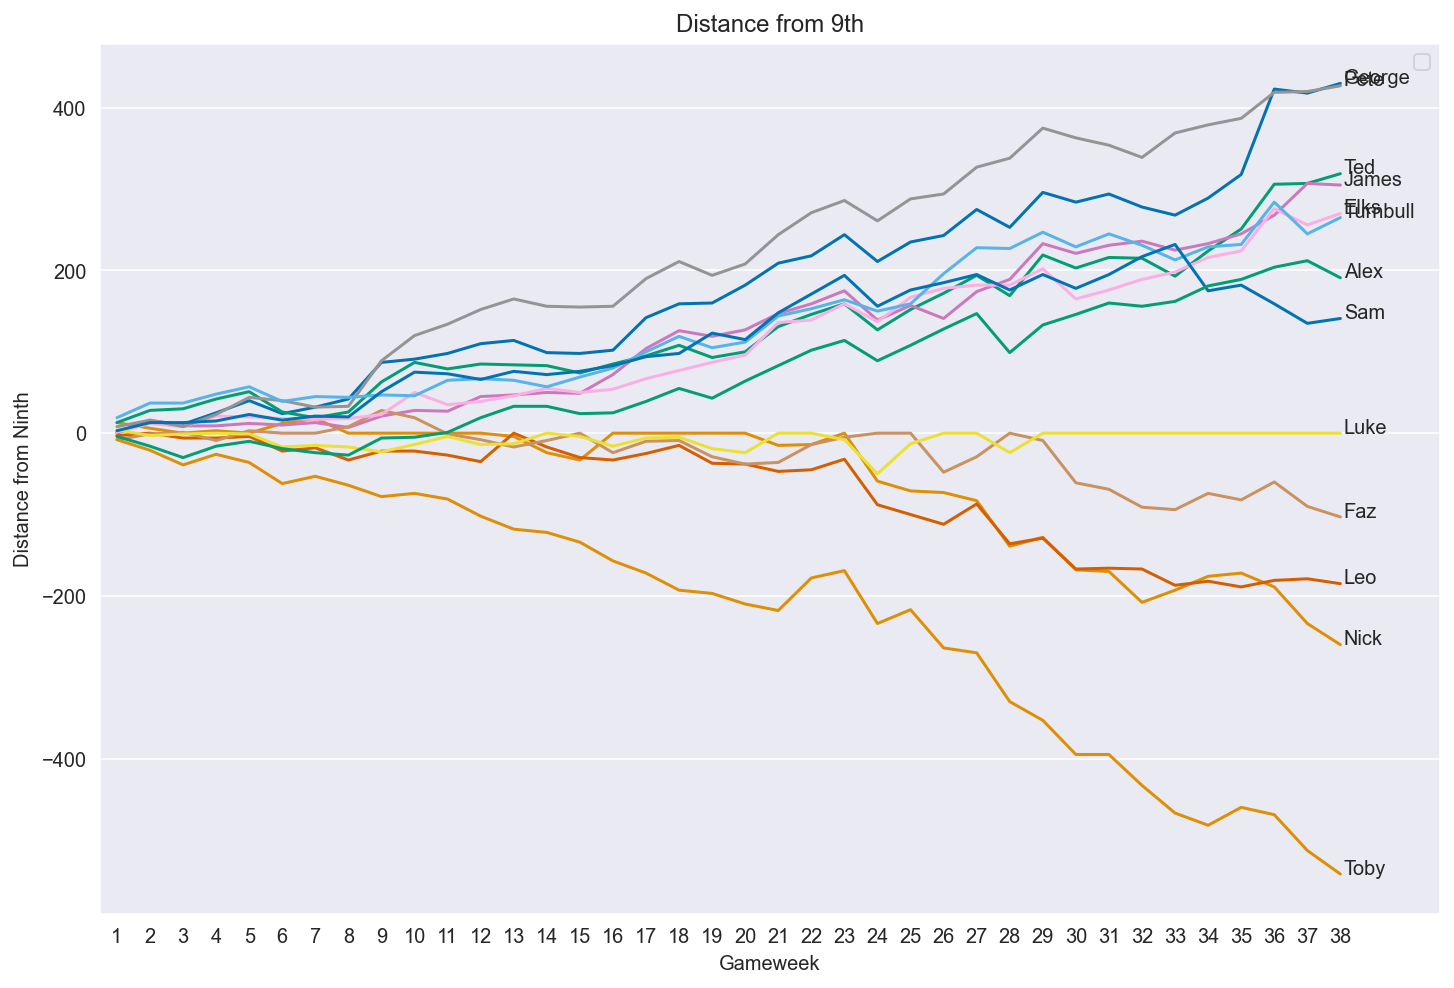

In [74]:
# create dist plot
gw = int(df_all.event.max())
curr_dist = df_all[df_all.event==gw].sort_values("total_points",ascending=False)[["player","distpw_from_ninth"]]
sns.set_style('dark')
plt.figure(figsize=(12,8))
dist_9th=sns.lineplot(y=df_all.distpw_from_ninth.tolist(),x=df_all.event.tolist(),hue=df_all.player.tolist(),palette="colorblind")

last = 1000
for i in range(len(curr_dist)):
#     if last - curr_dist.iloc[i,1] < 5:
#         dist_9th.annotate(curr_dist.iloc[i,0],(gw+0.1,curr_dist.iloc[i,1]-5))
#     else:
    dist_9th.annotate(curr_dist.iloc[i,0],(gw+0.1,curr_dist.iloc[i,1]))
#     last = curr_dist.iloc[i,1]

plt.xticks(range(1,gw+1))
plt.xlim(0.5,gw+3)

plt.title("Distance from 9th")
plt.xlabel("Gameweek")
plt.ylabel("Distance from Ninth")
plt.legend("")
plt.grid(axis = "y")
plt.show()

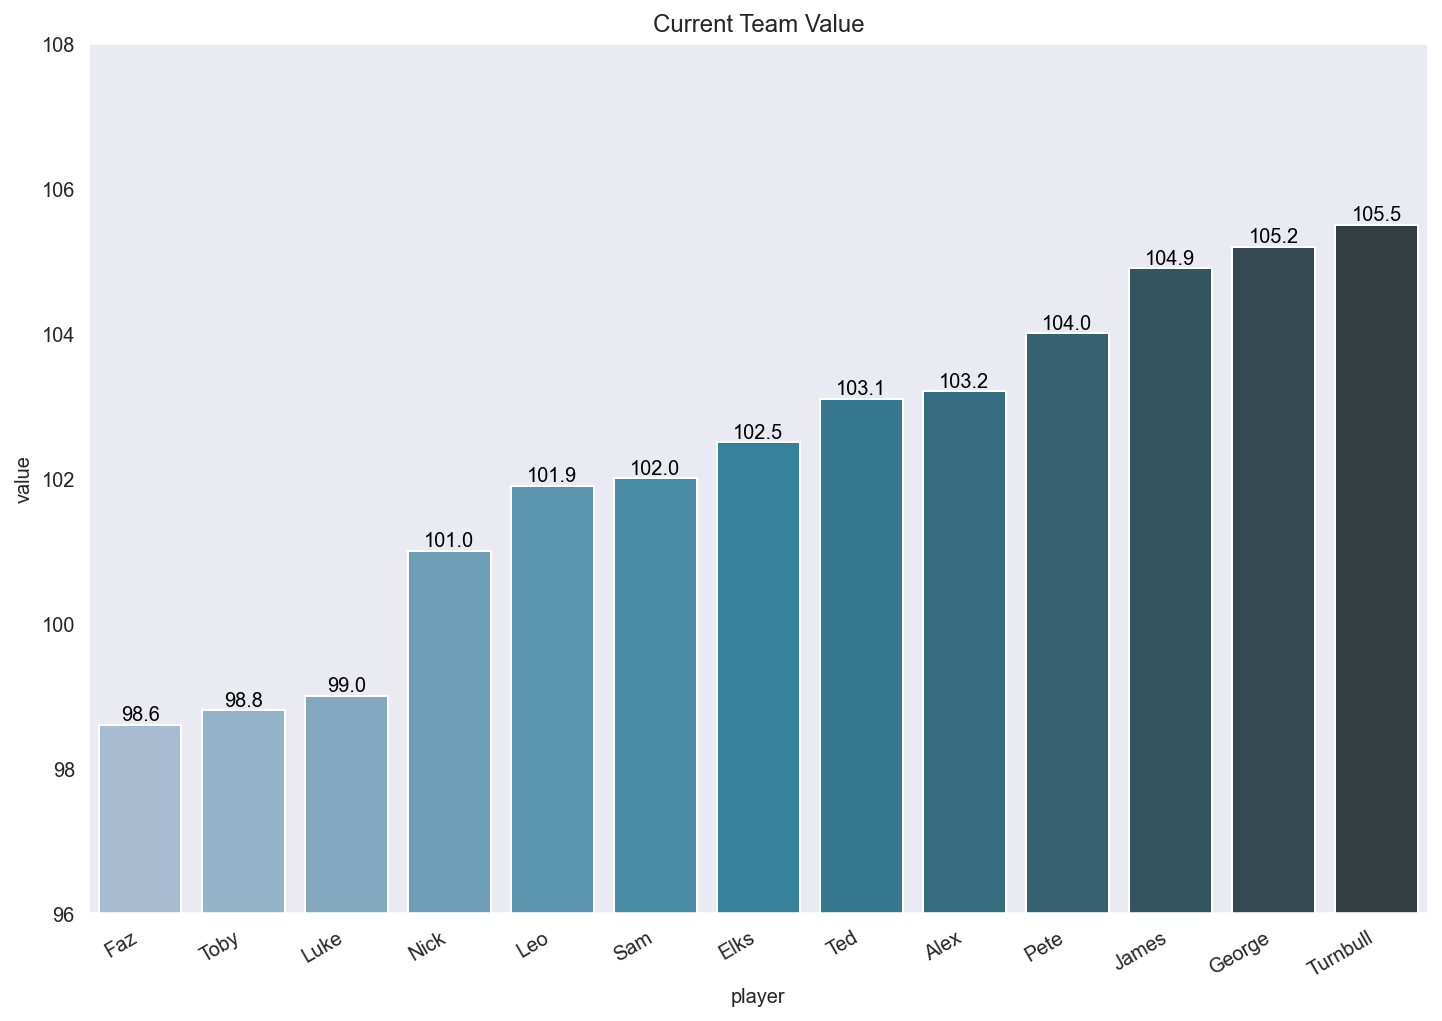

In [75]:
# Current team value
df_temp = df_all[df_all['event']==df_all['event'].max()][['value','bank','player']].sort_values('value')
# df_temp['']
plt.figure(figsize=(12,8))
team_value = sns.barplot(y=df_temp['value']/10,x=df_temp.player,palette='PuBuGn_d')
plt.title("Current Team Value")
plt.xticks(rotation=30,ha="right")
for p in team_value.patches:
    team_value.annotate(round(p.get_height(),2), (p.get_x() + p.get_width() / 2., p.get_height()),
     ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
     textcoords='offset points')
plt.ylim(96,108)
plt.show()

## Looking at ownership

In [76]:
#Formatting names
df_league['player'] = df_league['player_name'].apply(lambda x: "Alex Andreou" if x == "A A" else x)
df_league['player'] = df_league['player'].apply(lambda x: "Turnbull" if x == "Henry Turnbull" else x)
df_league['player'] = df_league['player'].apply(lambda x: "Elks" if x == "Henry Elks" else x)
df_league['player'] = df_league['player'].apply(lambda x: x.split()[0])

In [77]:
#Looping through and creating a df of the leagues picks
for row in df_league.index:
    url = "https://fantasy.premierleague.com/api/entry/{}/event/{}/picks/".format(df_league.iloc[row,7],gw)
    r = requests.get(url)
    picks = r.json()
    if row == 0:
        df_picks = pd.DataFrame(picks['picks'])
        df_picks['player'] = df_league.iloc[row,-1]
    else:
        df_temp = pd.DataFrame(picks['picks'])
        df_temp['player'] = df_league.iloc[row,-1]
        df_picks = pd.concat([df_picks,df_temp])

In [78]:
url = 'https://fantasy.premierleague.com/api/bootstrap-static/'
r = requests.get(url)
json_data = r.json()
player_df = pd.DataFrame(json_data['elements'])
teams_df = pd.DataFrame(json_data['teams'])
player_df.team = player_df.team.map(pd.Series(teams_df.name.values,teams_df.id).to_dict())

In [79]:
df_picks['web_name'] = df_picks.element.map(pd.Series(player_df.web_name.values,player_df.id).to_dict())
df_picks['team']=df_picks.element.map(pd.Series(player_df.team.values,player_df.id).to_dict())

In [80]:
df_picks.head()

,element,position,multiplier,is_captain,is_vice_captain,player,web_name,team
0,200,1,1,False,False,George,Schmeichel,Leicester
1,256,2,1,False,False,George,Cancelo,Man City
2,142,3,1,False,False,George,James,Chelsea
3,237,4,1,False,False,George,Alexander-Arnold,Liverpool
4,259,5,1,False,False,George,Laporte,Man City


In [81]:
df_EO = df_picks.groupby(["web_name","team"])[['multiplier']].sum()/len(df_league.index)*100
df_EO = df_EO.reset_index()
df_EO = df_EO[df_EO.multiplier>1/len(df_league.index)*100]
df_EO = df_EO.sort_values(by='multiplier',ascending=False)

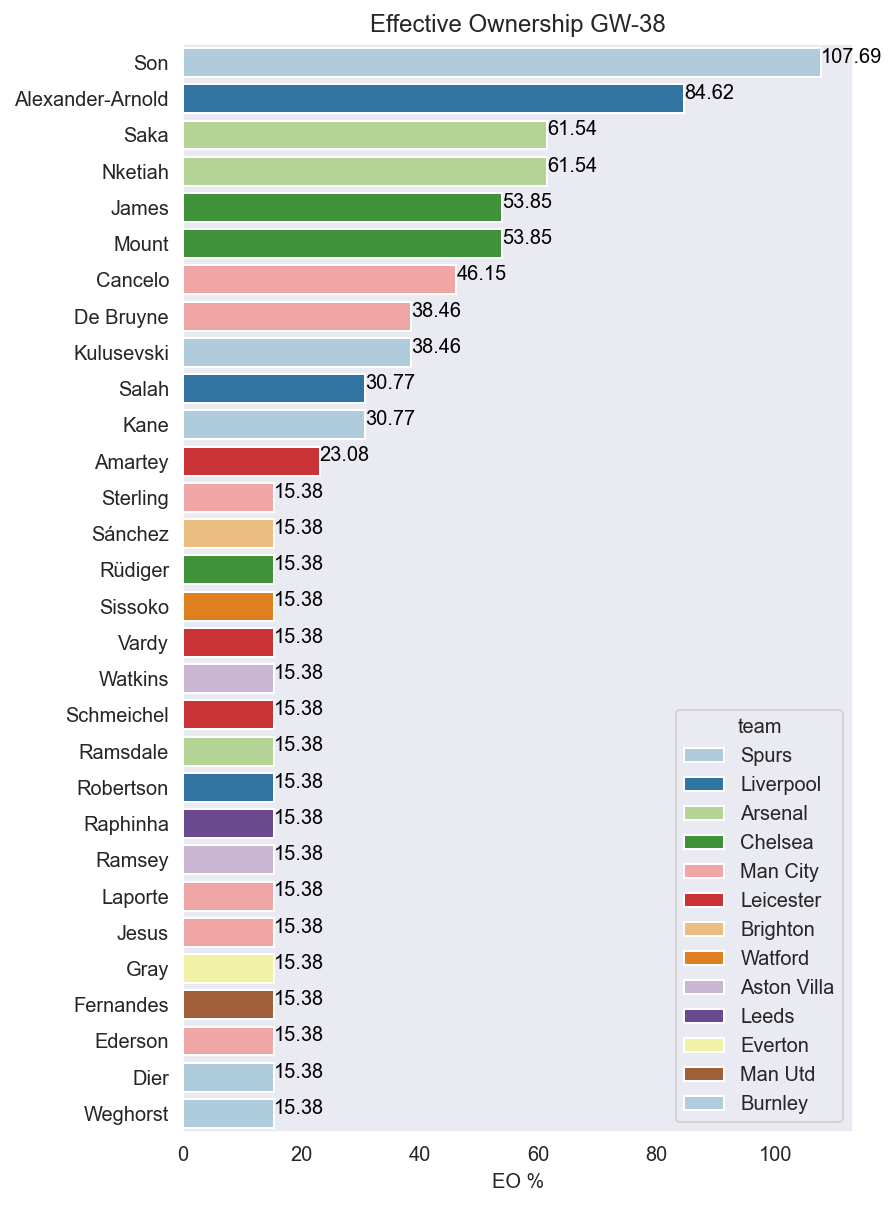

In [82]:
plt.figure(figsize=(6,10))
EO_plot = sns.barplot(y=df_EO.web_name,x=df_EO.multiplier,hue=df_EO.team,dodge=False,palette='Paired')
plt.title("Effective Ownership GW-{}".format(gw))
plt.xlabel("EO %")
plt.ylabel("")
for p in EO_plot.patches:
    EO_plot.annotate(round(p.get_width(),2), (p.get_width(),p.get_y()+p.get_height()/1.5),
     ha='left', va='center', fontsize=10, color='black', xytext=(0, 5),
     textcoords='offset points')
plt.show()

In [83]:
df_picks[df_picks.web_name == "Salah"]

,element,position,multiplier,is_captain,is_vice_captain,player,web_name,team
6,233,7,1,False,False,Leo,Salah,Liverpool
8,233,9,2,True,False,Nick,Salah,Liverpool
6,233,7,1,False,False,Toby,Salah,Liverpool


In [84]:
# Cheeky differentials
df_diff = df_picks.groupby(["web_name"])[['multiplier']].sum()
df_diff = df_diff[df_diff.multiplier==1]
df_diff = df_diff.reset_index()
df_diff['player'] = df_diff.web_name.map(pd.Series(df_picks[df_picks.multiplier!=0].player.values,df_picks[df_picks.multiplier!=0].web_name).to_dict())
df_diff.drop('multiplier',inplace=True,axis=1)
df_diff.columns = ["Rogue Choice", "Manager"]
df_diff = df_diff.sort_values('Manager')
df_diff = df_diff.set_index('Manager')

In [85]:
df_diff

,Rogue Choice
Manager,
Alex,Raya
Elks,Pukki
Elks,Coutinho
James,Mendy
James,Foden
James,Fabianski
James,Matip
James,Mané
James,Cash


In [161]:
player_df

,chance_of_playing_next_round,chance_of_playing_this_round,code,cost_change_event,cost_change_event_fall,cost_change_start,cost_change_start_fall,dreamteam_count,element_type,ep_next,...,threat_rank,threat_rank_type,ict_index_rank,ict_index_rank_type,corners_and_indirect_freekicks_order,corners_and_indirect_freekicks_text,direct_freekicks_order,direct_freekicks_text,penalties_order,penalties_text
0,NaN,NaN,80201,0,0,-2,2,0,1,0.5,...,522,52,270,19,NaN,,NaN,,NaN,
1,0.0,0.0,115918,0,0,0,0,0,1,0.0,...,351,14,419,37,NaN,,NaN,,NaN,
2,0.0,0.0,47431,0,0,-2,2,0,3,0.0,...,603,246,605,246,NaN,,NaN,,NaN,
3,100.0,100.0,54694,0,0,-1,1,0,4,5.0,...,17,9,39,13,NaN,,NaN,,1.0,
4,NaN,NaN,58822,0,0,-2,2,0,2,0.7,...,328,112,286,98,NaN,,5.0,,NaN,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,NaN,NaN,245923,0,0,0,0,0,3,0.0,...,491,194,528,203,NaN,,NaN,,NaN,
607,NaN,NaN,461026,0,0,0,0,0,3,0.0,...,500,199,535,207,NaN,,NaN,,NaN,
608,0.0,0.0,481626,0,0,0,0,0,2,0.0,...,383,142,448,164,NaN,,NaN,,NaN,
609,NaN,NaN,184754,0,0,0,0,0,4,2.8,...,84,28,192,31,NaN,,NaN,,NaN,


In [162]:
# Captaining error

#LoopThrough league managers

    #Loop through gws
#         #Loop through active players
url = "https://fantasy.premierleague.com/api/entry/1409005/event/4/picks/"
r = requests.get(url)
picks = r.json()
df_temp3 = pd.DataFrame(picks['picks']) 
df_temp3


# for player in df_temp3.element:
# load player history - link to fixtures to find gw and then look back up in player history
#compare all multiplier 1 to multiplier 2 - if no multiplier 2 then max


,element,position,multiplier,is_captain,is_vice_captain
0,270,1,1,False,False
1,262,2,1,False,False
2,273,3,1,False,False
3,229,4,1,False,False
4,250,5,1,False,False
5,171,6,1,False,False
6,233,7,2,True,False
7,422,8,1,False,False
8,189,9,1,False,False
9,205,10,1,False,True


In [163]:
url = "https://fantasy.premierleague.com/api/element-summary/273/"
r = requests.get(url)
json_data = r.json()
pd.DataFrame(json_data['history'])

,element,fixture,opponent_team,total_points,was_home,kickoff_time,team_h_score,team_a_score,round,minutes,...,bps,influence,creativity,threat,ict_index,value,transfers_balance,selected,transfers_in,transfers_out
0,273,6,10,2,True,2021-08-14T11:30:00Z,5.0,1.0,1,90,...,12,10.0,0.9,4.0,1.5,55,0,842854,0,0
1,273,19,16,1,False,2021-08-22T13:00:00Z,1.0,1.0,2,90,...,5,12.6,1.2,7.0,2.1,55,-38065,925801,33832,71897
2,273,30,20,7,False,2021-08-29T15:30:00Z,0.0,1.0,3,90,...,30,27.2,0.7,22.0,5.0,55,-77057,873199,20207,97264
3,273,38,14,2,True,2021-09-11T14:00:00Z,4.0,1.0,4,90,...,14,26.8,2.6,17.0,4.6,55,-79121,817449,28529,107650
4,273,49,19,2,False,2021-09-19T13:00:00Z,1.0,2.0,5,90,...,13,19.0,1.3,8.0,2.8,54,-80867,744888,8612,89479
5,273,58,2,7,True,2021-09-25T11:30:00Z,0.0,1.0,6,66,...,23,19.0,0.3,19.0,3.8,54,-44868,708288,11096,55964
6,273,67,8,0,True,2021-10-02T11:30:00Z,NaN,NaN,7,0,...,0,0.0,0.0,0.0,0.0,54,-136286,570420,2052,138338


In [164]:
df_league

,id,event_total,player_name,rank,last_rank,rank_sort,total,entry,entry_name,player
0,22488436,0,Pete Stebbing,1,1,1,434,1861744,Diego Marastebbo,Pete
1,20241183,0,Henry Turnbull,2,2,2,433,1364762,Expected Ghouls,Turnbull
2,16819673,0,Ted Rosner,3,3,3,420,107878,Blaise Maweedie,Ted
3,25158712,0,George Baker Baker,4,4,4,418,1796385,Borocelona,George
4,21699595,0,Henry Elks,5,5,5,412,2631883,Debbie Does Gallas,Elks
5,20076908,0,Sam Guest,6,6,6,410,776505,Tossed Salah,Sam
6,23673927,0,Nick Sissling,7,7,7,406,3651523,Sissling Select,Nick
7,16523966,0,James Rivers,8,8,8,404,2805214,Cry me a River,James
8,43941031,0,James Fazackerley,9,9,9,394,1447926,Mike Dean's Bean,James
9,23446904,0,Luke Betham,10,10,10,377,1583735,Nanas Squad,Luke


In [165]:
## Publishing to datapane

In [86]:
dp.login(token="091830a120b8c1f1cde36fd23c9e06d4b81bfc6b")
r = dp.Report(
    f'### Effective Ownership FPL League',

    
    dp.Select(blocks=[
        dp.Plot(ranking,responsive=False, label='Ranking'),
        dp.Plot(dist_9th,responsive=False, label='Distance from Ninth place'),
        dp.Plot(EO_plot,responsive=False,label="Effective Ownership"),
        dp.Table(df_diff,label="Full Differentials")
    ]),
    dp.Select(blocks=[
        dp.Plot(bench_chart,responsive=False, label='Points on Bench'),
        dp.Plot(x_transfers,responsive=False, label='Hits'),
        dp.Plot(max_week,responsive=False, label='Biggest Week'),
        dp.Plot(consistency,responsive=False, label='Consistency'),
        dp.Plot(current_percentile,responsive=False, label='Current %'),
        dp.Plot(team_value,responsive=False, label='Team Value')],type=dp.SelectType.TABS)
    
)

Connected successfully to https://datapane.com as lukebetham@hotmail.com


In [167]:
# dp.login(token="091830a120b8c1f1cde36fd23c9e06d4b81bfc6b")
# data = dp.Report(
#     f'### Effective Ownership FPL League - data',
#     dp.DataTable(df_all)
# )

Connected successfully to https://datapane.com as lukebetham


In [87]:
r.upload(name=f'Effective Ownership', open=True, description=f'')

Uploading report and associated data - *please wait...*

Your report only contains a single element - did you know you can include additional plots, tables and text in a single report? More info <a href='https://docs.datapane.com/reports/blocks/layout-pages-and-selects' target='_blank'>here</a>

Report successfully uploaded. View and share your report <a href='https://datapane.com/reports/O7vZ4p7/effective-ownership/' target='_blank'>here</a>, or edit your report <a href='https://datapane.com/reports/O7vZ4p7/effective-ownership/edit/' target='_blank'>here</a>.

In [169]:
data.publish(name=f'Effective Ownership Data', open=True, description=f'')

AttributeError: 'Report' object has no attribute 'publish'

In [ ]:
df_all[df_all.event==1].total_points.rank(method='min',ascending=False)

In [ ]:
df_all[df_all['event']==14]